# Sensitivity to solar radiation, subsidence and treatment of ice surface
The notebook below shows sensitivity tests during specification development. We used 200-m resolution on a 25-km domain as an adequate setup to evaluate sensitivity. All simulations use DHARMA's default roughness lengths.
* **DHARMA-MIZ-RAD_Lx25km_dx200_FixN -**
We started with this more complex set-up: Upstream of the ice edge, the surface was treated as an ice surface of specified temperature and a fixed roughness length of 0.0001 m. Downstream of the ice edge, Charnock's relation was used for roughness over a water surface. Both solar and longwave radiation were included.
* **DHARMA-MIZ-RAD_Lx25km_dx200_FixN_SWoff -**
Turning off solar radiation had little effect, so that was omitted.
* **DHARMA-MIZ-RAD_Lx25km_dx200_FixN_SWoff_Wsub -**
Turning on large-scale subsidence derived from ERA5 had little effect, so that was omitted. This avoided the need for offsetting specifications to avoid spurious thermodynamic evolution owing to disconinuity at domain top. Omitting subsidence also greatly simplifies analyses for process understanding.
* **DHARMA-MIZ-RAD_Lx25km_dx200_FixN_noMIZ -**
Treating the ice surface as a water surface that is supercooled enough to match ice surface surface fluxes also had little effect. This greatly simplifies the setup especially for Earth system model codes run in single-column model mode. Since it also had negligible effect that we could identify in LES, this was adopted as a helpful simplification. Thanks to Mikhail Ovchinnikov and Peng Wu for sharing this approach.  

We consider the differences between all of the simulations shown below to be within the uncertainty of the specification derivation. We then proceeded to test sensitivity to roughness lengths in both DHARMA and WRF.

Source: Ann Fridlind (ann.fridlind@nasa.gov), Andrew Ackerman (andrew.ackerman@nasa.gov), and Florian Tornow (ft2544@columbia.edu)

In [1]:
%run functions_plotting.py 
 
## select simulations to plot
sim_keyword = 'MIZ-RAD'

In [2]:
## load all simulations located in subfolders of the given directory
var_vec_1d = ['hfss','hfls','ts','lwpr','lwpc','iwp','od']
var_vec_2d = ['theta','qv','qlc','qlr','qic','qis','qig','ua','va','ta']
df_col_1d,df_col_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword,diag_zi_ctt=True)

Loading variables: f(time)
../../output_les/dharma/devel/DHARMA-MIZ-RAD_Lx25km_dx200_FixN.nc
../../output_les/dharma/devel/DHARMA-MIZ-RAD_Lx25km_dx200_FixN_SWoff.nc
../../output_les/dharma/devel/DHARMA-MIZ-RAD_Lx25km_dx200_FixN_SWoff_Wsub.nc
../../output_les/dharma/devel/DHARMA-MIZ-RAD_Lx25km_dx200_FixN_noMIZ.nc
Loading variables: f(time,height)
../../output_les/dharma/devel/DHARMA-MIZ-RAD_Lx25km_dx200_FixN.nc
../../output_les/dharma/devel/DHARMA-MIZ-RAD_Lx25km_dx200_FixN_SWoff.nc
../../output_les/dharma/devel/DHARMA-MIZ-RAD_Lx25km_dx200_FixN_SWoff_Wsub.nc
../../output_les/dharma/devel/DHARMA-MIZ-RAD_Lx25km_dx200_FixN_noMIZ.nc
computing inversion height, cloud-top height, and cloud-top temperature
using liquid(-ice) potential temperature


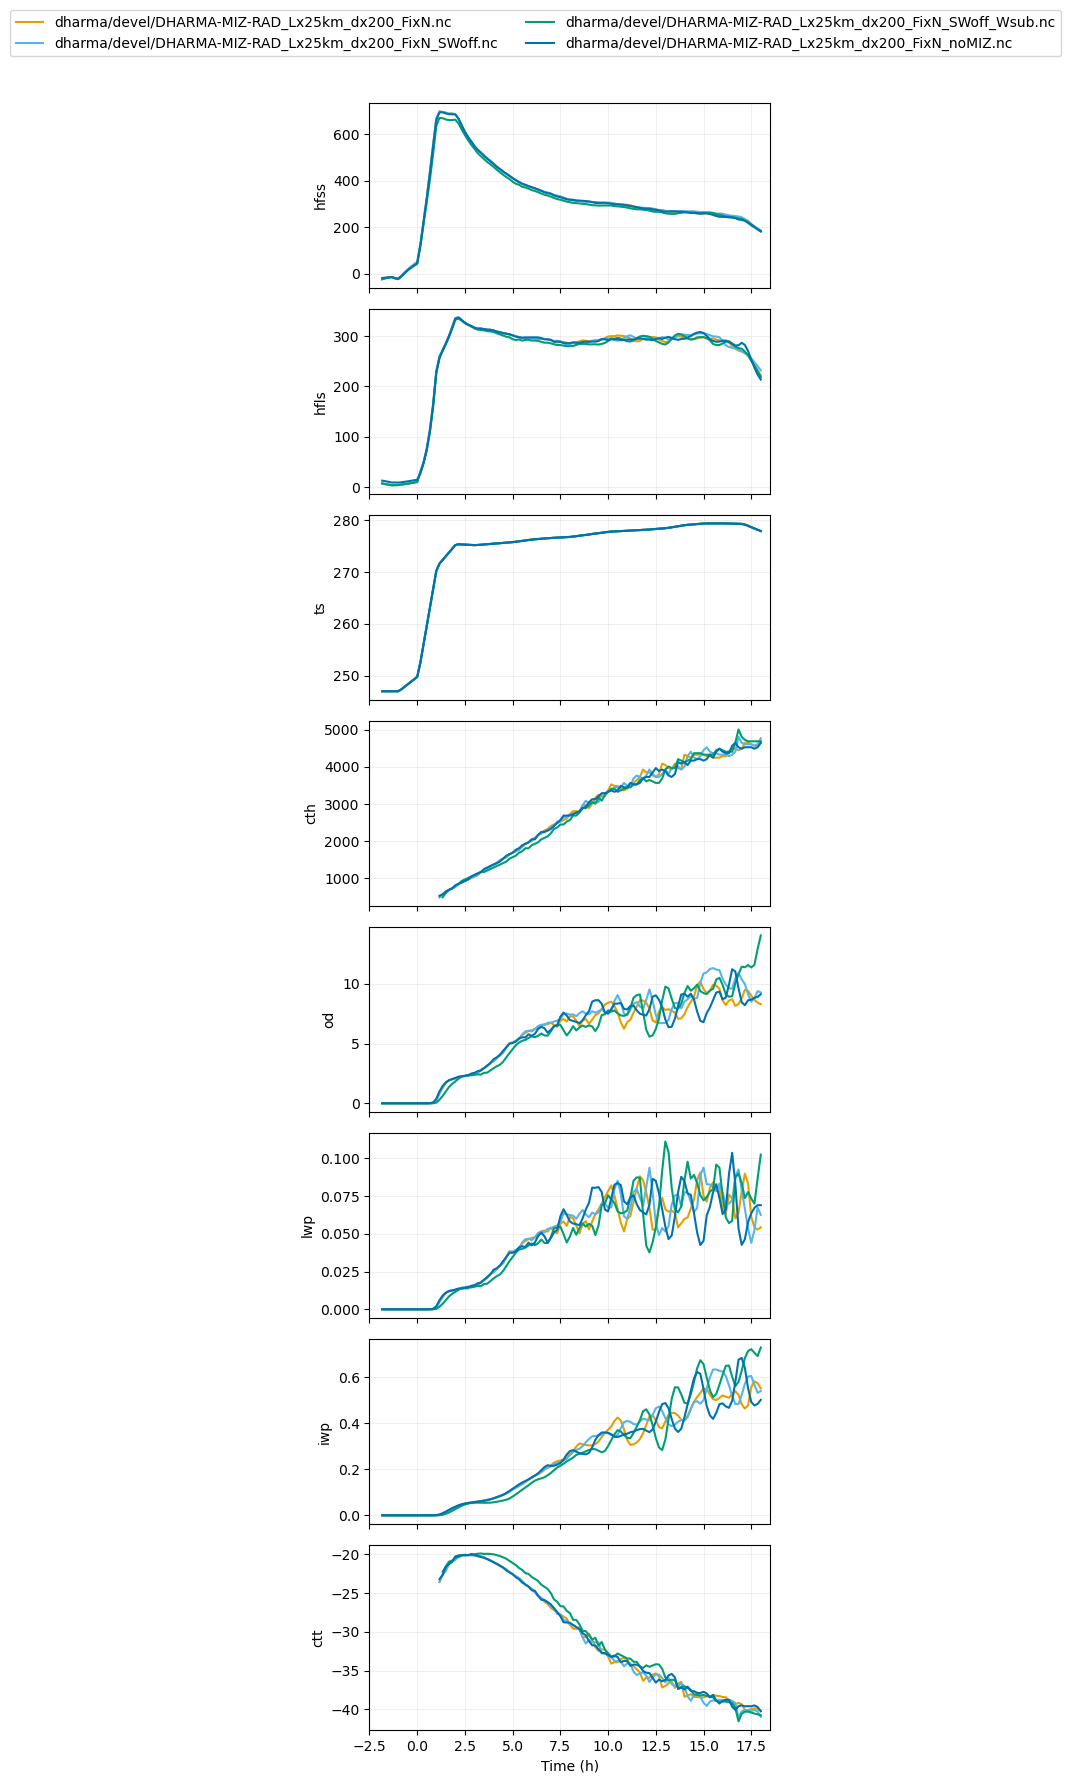

In [3]:
## plot variables that have only time dependence
plot_1d(pd.concat([df_col_1d]),['hfss','hfls','ts','cth','od','lwp','iwp','ctt'])

Computing wind speed
Computing wind direction


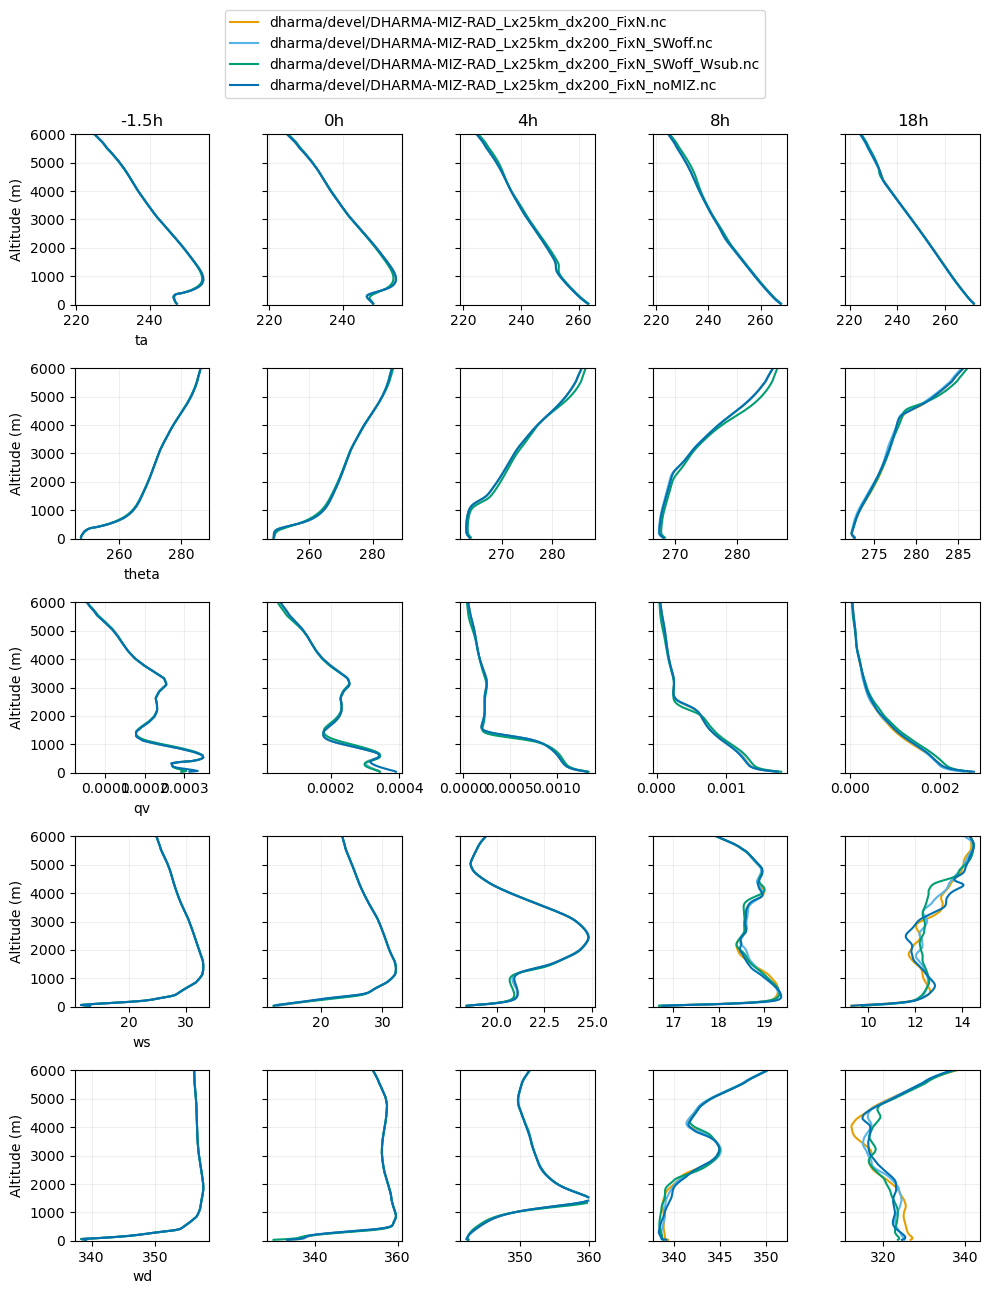

<Figure size 1000x600 with 0 Axes>

In [4]:
## plot all variables that have time and height dependence
plot_2d(pd.concat([df_col_2d]),var_vec = ['ta','theta','qv','ws','wd'],times=[-1.5,0,4,8,18],z_max=6000)